# Paradise Papers
The Paradise Papers is a global investigation into the offshore activities of some of the world’s most powerful people and companies.

The International Consortium of Investigative Journalists and 95 media partners explored 13.4 million leaked files from a combination of offshore service providers and the company registries of some of the world’s most secretive countries.

The files were obtained by the German newspaper Süddeutsche Zeitung.

The Paradise Papers documents include nearly 7 million loan agreements, financial statements, emails, trust deeds and other paperwork from nearly 50 years at Appleby, a leading offshore law firm with offices in Bermuda and beyond.

The documents also include files from a smaller, family-owned trust company, Asiaciti, and from company registries in 19 secrecy jurisdictions. The records range from complex, 100-page corporate transaction sheets and dollar-by-dollar payment ledgers to simple corporate registries of countries, such as Antigua & Barbuda, that do not publicly list names of company shareholders or directors.

As a whole, the Paradise Papers files expose offshore holdings of political leaders and their financiers as well as household-name companies that slash taxes through transactions conducted in secret. Financial deals of billionaires and celebrities are also revealed in the documents.

The Paradise Papers files include far more information about U.S. citizens, residents and companies than previous ICIJ investigations – at least 31,000 of them.

ICIJ collaborated with more than 380 journalists working on six continents in 30 languages. Many team members spent a year using online platforms to communicate and to share documents. Journalists tracked down court records, obtained financial disclosures of politicians in Africa, Europe, and Latin and North America, filed freedom of information requests and conducted hundreds of interviews with tax experts, policymakers and industry insiders.

In [86]:
! curl https://offshoreleaks-data.icij.org/offshoreleaks/csv/csv_paradise_papers.2018-02-14.zip -o csv_paradise_papers.zip
!unzip csv_paradise_papers.zip -d csv_paradise_papers
!wc -l csv_paradise_papers/*

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.1M  100 28.1M    0     0  22.0M      0  0:00:01  0:00:01 --:--:-- 22.0M
Archive:  csv_paradise_papers.zip
replace csv_paradise_papers/paradise_papers.edges.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
  1657839 csv_paradise_papers/paradise_papers.edges.csv
   223351 csv_paradise_papers/paradise_papers.nodes.address.csv
   290087 csv_paradise_papers/paradise_papers.nodes.entity.csv
     1569 csv_paradise_papers/paradise_papers.nodes.intermediary.csv
   350009 csv_paradise_papers/paradise_papers.nodes.officer.csv
     2920 csv_paradise_papers/paradise_papers.nodes.other.csv
  2525775 total


In [17]:
!ls csv_paradise_papers/*

csv_paradise_papers/paradise_papers.edges.csv
csv_paradise_papers/paradise_papers.nodes.address.csv
csv_paradise_papers/paradise_papers.nodes.entity.csv
csv_paradise_papers/paradise_papers.nodes.intermediary.csv
csv_paradise_papers/paradise_papers.nodes.officer.csv
csv_paradise_papers/paradise_papers.nodes.other.csv


In [16]:
!cd csv_paradise_papers/ && head paradise_papers.* -n 4

==> paradise_papers.edges.csv <==
"START_ID","TYPE","END_ID","link","start_date","end_date","sourceID","valid_until"
"85004927","registered_address","88000379","registered address","","","Paradise Papers - Aruba corporate registry","Aruba corporate registry data is current through 2016"
"85004928","registered_address","88016409","registered address","","","Paradise Papers - Aruba corporate registry","Aruba corporate registry data is current through 2016"
"85004929","registered_address","88005855","registered address","","","Paradise Papers - Aruba corporate registry","Aruba corporate registry data is current through 2016"

==> paradise_papers.nodes.address.csv <==
"node_id","name","address","country_codes","countries","sourceID","valid_until","note"
"81014050","6B Chenyu Court; 22-24 Kennedy Road; Hong Kong","6B Chenyu Court","HKG","Hong Kong","Paradise Papers - Appleby","Appleby data is current through 2014",""
"81014052","15C Suchun Industrial Square; Suzhou Industrial Park; 215126 S

In [4]:
import findspark
findspark.init()
import pyspark 

from IPython.core.display import display,HTML
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Paradise Paper") \
  .config("spark.driver.memory", "4G") \
  .config("spark.executor.memory", "4G") \
  .config("spark.jars.packages",'graphframes:graphframes:0.8.1-spark3.0-s_2.12') \
  .getOrCreate()


In [5]:
edges_csv_path = "csv_paradise_papers/paradise_papers.edges.csv"
edgesDF = spark.read.format("com.databricks.spark.csv").option("header", "true") \
                    .load(edges_csv_path)
edgesDF.createOrReplaceTempView("edges")
edgesDF.printSchema()

edgesDF.limit(10).toPandas().head()

root
 |-- START_ID: string (nullable = true)
 |-- TYPE: string (nullable = true)
 |-- END_ID: string (nullable = true)
 |-- link: string (nullable = true)
 |-- start_date: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- sourceID: string (nullable = true)
 |-- valid_until: string (nullable = true)



,START_ID,TYPE,END_ID,link,start_date,end_date,sourceID,valid_until
0,85004927,registered_address,88000379,registered address,None,None,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...
1,85004928,registered_address,88016409,registered address,None,None,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...
2,85004929,registered_address,88005855,registered address,None,None,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...
3,85004929,connected_to,85008101,connected to,None,None,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...
4,85004929,connected_to,85021444,connected to,None,None,Paradise Papers - Aruba corporate registry,Aruba corporate registry data is current throu...


In [3]:
df = spark.sql("SELECT TYPE, count(*) as TOTAL FROM edges GROUP BY TYPE ORDER BY TOTAL")
pandas_df = df.toPandas()
pandas_df.head(10)

,TYPE,TOTAL
0,same_as,166
1,same_id_as,3120
2,connected_to,12145
3,same_name_as,59500
4,intermediary_of,99695
5,registered_address,450551
6,officer_of,1032661


In [131]:
from IPython.core.display import display, HTML
from string import Template
import pandas as pd
import json, random
from andromeda import *

In [9]:
HTML('<script src="./d3.min.js"></script>')
HTML(display_bar(pandas_df))

In [6]:
addresses_csv_path = "csv_paradise_papers/paradise_papers.nodes.address.csv"
entity_csv_path ="csv_paradise_papers/paradise_papers.nodes.entity.csv"
intermediary_csv_path ="csv_paradise_papers/paradise_papers.nodes.intermediary.csv"
officer_csv_path ="csv_paradise_papers/paradise_papers.nodes.officer.csv"
other_csv_path ="csv_paradise_papers/paradise_papers.nodes.other.csv"
def load(path,name):
    df= spark.read.format("com.databricks.spark.csv") \
        .option("header", "true") \
        .load(path)
    print(name)
    df.createOrReplaceTempView(name)
    df.printSchema()
    return  df

addresses = load(addresses_csv_path,"addresses")
entity = load(entity_csv_path, "entity")
intermediary = load(intermediary_csv_path, "intermediary")
officer = load(officer_csv_path, "officer")
other = load(other_csv_path,"other")


addresses
root
 |-- node_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- address: string (nullable = true)
 |-- country_codes: string (nullable = true)
 |-- countries: string (nullable = true)
 |-- sourceID: string (nullable = true)
 |-- valid_until: string (nullable = true)
 |-- note: string (nullable = true)

entity
root
 |-- node_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- jurisdiction: string (nullable = true)
 |-- jurisdiction_description: string (nullable = true)
 |-- country_codes: string (nullable = true)
 |-- countries: string (nullable = true)
 |-- incorporation_date: string (nullable = true)
 |-- inactivation_date: string (nullable = true)
 |-- struck_off_date: string (nullable = true)
 |-- closed_date: string (nullable = true)
 |-- ibcRUC: string (nullable = true)
 |-- status: string (nullable = true)
 |-- company_type: string (nullable = true)
 |-- service_provider: string (nullable = true)
 |-- sourceID: string (nullable = t

In [14]:
df = spark.sql("SELECT countries, count(*) as TOTAL FROM officer WHERE countries!= 'None' GROUP BY countries ORDER BY TOTAL desc")
pandas_df = df.limit(100).toPandas()
pandas_df.head(10)

,countries,TOTAL
0,Malta,44564
1,United States,19020
2,United Kingdom,8354
3,Italy,6117
4,Samoa,4302
5,China,3469
6,Hong Kong,3461
7,Bermuda,3079
8,Germany,2724
9,British Virgin Islands,2565


<AxesSubplot:xlabel='countries', ylabel='TOTAL'>

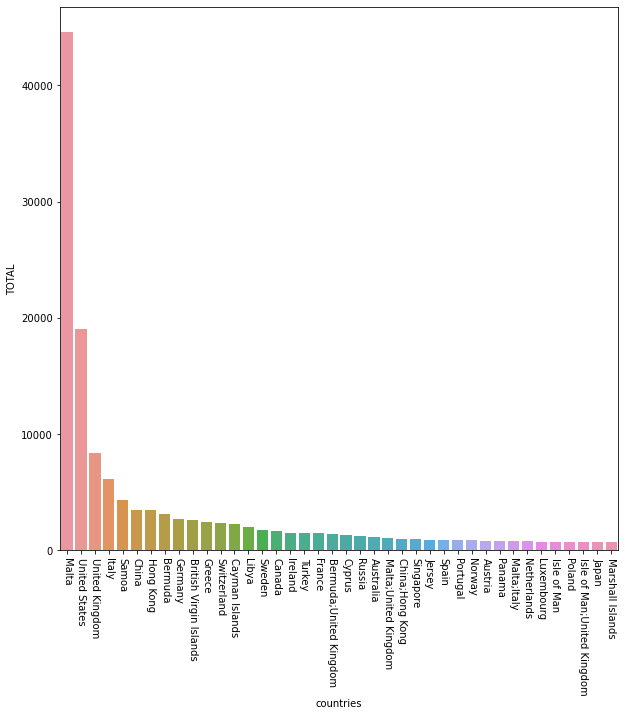

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.xticks(rotation=-90)
plt.rcParams['figure.figsize']=(10,10)
sns.barplot(x="countries", y="TOTAL", data=pandas_df.head(40))


In [155]:
vertices = spark.sql('''
               SELECT node_id, name FROM addresses UNION
               SELECT node_id, name FROM entity UNION
               SELECT node_id, name FROM intermediary UNION
               SELECT node_id, name FROM officer UNION
               SELECT node_id, name FROM other
               ''').toDF("id","name")
vertices.show(10,False)
print(f"Total Nodes : {vertices.count()}")
edges = spark.sql("SELECT START_ID as src,END_ID as dst, trim(TYPE) as relationship FROM edges")
edges.show(10)
print(f"Total Edges : {edges.count()}")


+--------+-----------------------------------------------------------------------------------------------------------------+
|id      |name                                                                                                             |
+--------+-----------------------------------------------------------------------------------------------------------------+
|81014280|12F.-2, No. 768, Sec. 2; Yonghua Rd.; Anping Dist; Tainan City 708; Taiwan                                       |
|81014731|3/F., 25 Tsung Man Street; Aberdeen; Hong Kong                                                                   |
|81015190|11 Moorfields High Walk; London; EC2Y 9DY; United Kingdom                                                        |
|81015650|17 Toranomon Towers Office; 4-1-28 Toranomon; Minato-Ku Tokyo  105-0001; Japan                                   |
|81015946|PO Box 30076 SMB; George Town; Grand Cayman; Cayman Islands                                                      |


In [43]:
vertices.where("id=39062322").show(10)
edges.where("src=39062322").show(10)
vertices.where("id=39031113").show(10,False)
edges.where("src=39031113").show(10,False)
vertices.where("id=39184625").show(10,False)


+--------+------------------+
|      id|              name|
+--------+------------------+
|39062322|SANTOS JUAN MANUEL|
+--------+------------------+

+--------+--------+------------+
|     src|     dst|relationship|
+--------+--------+------------+
|39062322|39031113|  officer_of|
|39062322|39031075|  officer_of|
+--------+--------+------------+

+--------+------------------------------------------------+
|id      |name                                            |
+--------+------------------------------------------------+
|39031113|GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
+--------+------------------------------------------------+

+--------+--------+------------------+
|src     |dst     |relationship      |
+--------+--------+------------------+
|39031113|39184625|registered_address|
|39031113|39172370|registered_address|
+--------+--------+------------------+

+--------+-----------------------------------------------------------------------+
|id      |name                 

In [32]:
from functools import reduce
from pyspark.sql.functions import col, lit, when
from graphframes import *
g = GraphFrame(vertices, edges)
g

GraphFrame(v:[id: string, name: string], e:[src: string, dst: string ... 1 more field])

In [46]:
g.inDegrees.orderBy(col("inDegree").desc()).show(20)


+---------+--------+
|       id|inDegree|
+---------+--------+
| 81027146|    9268|
| 81027090|    8558|
| 81029389|    6120|
| 58007938|    2505|
| 88002083|    2339|
| 81027087|    2101|
|120001922|    1782|
| 81001128|    1318|
| 58009618|    1277|
| 58044817|    1266|
| 81073055|    1143|
| 88006887|     975|
| 88007148|     880|
| 88016591|     878|
|120007215|     868|
| 58034506|     816|
| 88016590|     812|
| 81010180|     792|
| 58005164|     738|
|120006498|     711|
+---------+--------+
only showing top 20 rows



In [153]:
!grep 81027146 csv_paradise_papers/paradise_papers.nodes.*
!grep 81027090 csv_paradise_papers/paradise_papers.nodes.*
!grep 81029389 csv_paradise_papers/paradise_papers.nodes.*
# !grep 39077348 csv_paradise_papers/paradise_papers.nodes.*
!grep 55050286 csv_paradise_papers/paradise_papers.nodes.*


csv_paradise_papers/paradise_papers.nodes.address.csv:"81027146","Clifton House; 75 Fort Street; Grand Cayman KY1-1108; Cayman Islands","Clifton House","CYM","Cayman Islands","Paradise Papers - Appleby","Appleby data is current through 2014",""
csv_paradise_papers/paradise_papers.nodes.address.csv:"81027090","Canon's Court; 22 Victoria Street; Hamilton; HM 12; Bermuda","Canon's Court","BMU","Bermuda","Paradise Papers - Appleby","Appleby data is current through 2014",""
csv_paradise_papers/paradise_papers.nodes.address.csv:"81029389","Argyle House; 41a Cedar Avenue; Hamilton HM 12; Bermuda","Argyle House","BMU","Bermuda","Paradise Papers - Appleby","Appleby data is current through 2014",""
csv_paradise_papers/paradise_papers.nodes.entity.csv:"55050286","ANGLER GAMING PLC","MLT","Malta","MLT","Malta","08-FEB-2012","","","","C55255","","","","Paradise Papers - Malta corporate registry","Malta corporate registry data is current through 2016",""


# Motif finding
Motif finding refers to searching for structural patterns in a graph.

GraphFrame motif finding uses a simple Domain-Specific Language (DSL) for expressing structural queries. For example, graph.find("(a)-[e]->(b); (b)-[e2]->(a)") will search for pairs of vertices a,b connected by edges in both directions. It will return a DataFrame of all such structures in the graph, with columns for each of the named elements (vertices or edges) in the motif. In this case, the returned columns will be “a, b, e, e2.”

In [150]:
motifs = g.find("(a)-[e]->(b)")
motifs.filter("b.id=39031113").select("a.name","b.name").distinct().show(20,False)
motifs = g.find("(a)-[e]->(b);(b)-[e2]->(c)")
motifs.filter("b.id=39031113").select("a.name","c.name").distinct().show(20,False)


+------------------------+------------------------------------------------+
|name                    |name                                            |
+------------------------+------------------------------------------------+
|HARRIDYAL-SODHA LIZA    |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|PUNGILUPPI CRISTINA     |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|Euroyacht Limited       |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|GAVIRIA JUAN CARLOS     |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|GAVIRIA SIMON           |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|DI GIACOMO THOMAS A.    |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|ALEANS ALEXANDRA B. P.  |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|DIGIACOMO THOMAS A.     |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|RAMIREZ CARLOS HERNANDEZ|GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|LESLIE JOHN W.          |GLOBAL TUITION & EDUCATION INSURANCE CORPORATION|
|CRICHLOW NI

## Connected components
Compute the connected component membership of each vertex and return a DataFrame with each vertex assigned a component ID. The GraphFrames connected components implementation can take advantage of checkpointing to improve performance.

In [47]:
spark.sparkContext.setCheckpointDir("/tmp/graphframes-example-connected-components")
result = g.connectedComponents().cache()
result.createOrReplaceTempView("connected")
result.show(10)

+---------+--------------------+---------+
|       id|                name|component|
+---------+--------------------+---------+
|100306296|C. F. UTILITIES S...|       26|
|100307721|L. P. INTEGRATED ...|        0|
|110050114|     DEANE HORACE S.|        0|
|135095409|ARTHUR-SELMAN JAM...|        0|
| 55045864|         TALOCAN LTD|     1452|
| 55050286|   ANGLER GAMING PLC|     1452|
| 55076319|FRESENIUS MEDICAL...|     1452|
| 56018478|   BARTOLOMEO XUEREB|     1452|
| 56037384|        MARIA DEBONO|     1452|
| 56073937|         MIRKO CUTER|     1452|
+---------+--------------------+---------+
only showing top 10 rows



In [58]:
components_group = spark.sql("SELECT component, count(*) as total FROM connected GROUP BY component ORDER BY total desc")
components_group.show(10)


juans_group = spark.sql("SELECT * FROM connected WHERE id =39062322")
juans_group.show(10)


group = spark.sql("SELECT * FROM connected WHERE component =3024")
group.show(10)

components_group.count()


+---------+------+
|component| total|
+---------+------+
|     1452|284325|
|     3024|161754|
|        0|161499|
|     3842| 72375|
|      966| 35360|
|     1346| 16632|
|     2969|  7566|
|     1015|  4640|
|     1000|  2637|
|      980|  2605|
+---------+------+
only showing top 10 rows

+--------+------------------+---------+
|      id|              name|component|
+--------+------------------+---------+
|39062322|SANTOS JUAN MANUEL|     3024|
+--------+------------------+---------+

+--------+--------------------+---------+
|      id|                name|component|
+--------+--------------------+---------+
|80040620|  Bovard - Carole J.|     3024|
|81027910|MORGAN & MORGAN T...|     3024|
|82009517|Fenix Financial (...|     3024|
|80102408| Mills - Christopher|     3024|
|80110416|Paredez - Remy Ra...|     3024|
|80116204|    Reardon - Edward|     3024|
|80146437|Wynsome Trading L...|     3024|
|81017784|4501 Liberty Road...|     3024|
|81043717|3750 State Road; ...|     3024|
|81

20150

In [37]:
results = g.pageRank(resetProbability=0.15, maxIter=10)
results.vertices.select("id", "pagerank").show(10)
results.edges.select("src", "dst", "weight").show(10)

+---------+------------------+
|       id|          pagerank|
+---------+------------------+
|100306296|1.5111855694854572|
|100307721|1.7708622873283673|
|110050114| 0.718279560804816|
|135095409|0.5596983590686878|
| 55045864|1.5176420898418563|
| 55050286|2.2977070374048565|
| 55076319| 2.331482876647793|
| 56018478|0.5596983590686878|
| 56037384|0.5596983590686878|
| 56073937|0.5596983590686878|
+---------+------------------+
only showing top 10 rows

+---------+---------+--------------------+
|      src|      dst|              weight|
+---------+---------+--------------------+
|110009137|110080823|               0.125|
|110029230|110114333|                 0.5|
|110072808|101802940|                 1.0|
| 55035715| 58141016|                 1.0|
| 56009486| 55038486|0.013157894736842105|
| 56010398| 58042149|                 0.5|
| 56015495| 58045621|                 0.5|
| 56024892| 58011317|0.023255813953488372|
| 56025796| 55032801|                 0.1|
| 56025796| 55032801|   

# pandas user-defined functions
A pandas user-defined function (UDF)—also known as vectorized UDF—is a user-defined function that uses Apache Arrow to transfer data and pandas to work with the data. pandas UDFs allow vectorized operations that can increase performance up to 100x compared to row-at-a-time Python UDFs
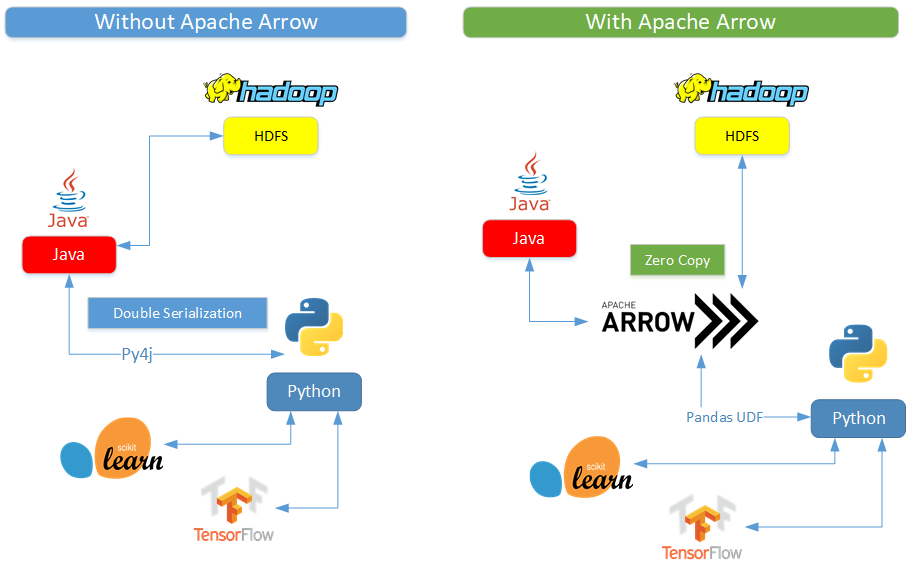

In [156]:
import pandas as pd
from pyspark.sql.functions import pandas_udf
from pyspark.sql import Window

df = spark.createDataFrame(
    [(1, 1.0), (1, 2.0), (2, 3.0), (2, 5.0), (2, 10.0)],
    ("id", "v"))

@pandas_udf("double")
def mean_udf(v: pd.Series) -> float:
    return v.mean()

df.select(mean_udf(df['v'])).show()
df.groupby("id").agg(mean_udf(df['v'])).show()

+-----------+
|mean_udf(v)|
+-----------+
|        4.2|
+-----------+

+---+-----------+
| id|mean_udf(v)|
+---+-----------+
|  1|        1.5|
|  2|        6.0|
+---+-----------+



In [10]:
HTML('<script src="./d3.min.js"></script>')

HTML(display_bar2(pandas_df))